In [48]:
import jieba
import numpy as np
import pandas as pd
from pylab import mpl
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from gensim import models
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
model = models.Word2Vec.load('./model/finance.model')

In [2]:
def get_vec(sentence, model):
    vec = np.zeros(model.vector_size)
    n = 0
    for word in jieba.cut(sentence):
        try:
            vec += model.wv[word]
            n += 1
        except KeyError:
            pass
    return vec if n==0 else vec/n 

In [31]:
def cluster_dbscan(sentence, model, esp=0.5, min_samples=5, algorithm='auto', n_jobs=6):
    vecs = np.array([get_vec(str(s), model) for s in sentence])
    clustering = DBSCAN(eps=esp, min_samples=min_samples, n_jobs=n_jobs, algorithm=algorithm).fit(vecs)
    cluster_result = pd.DataFrame({'sentence': pd.Series(sentence), 'cluster_labels': pd.Series(clustering.labels_)})
    cluster_result = cluster_result.fillna('999')
    cluster_result['cluster_labels'] = cluster_result['cluster_labels'].astype('int32')
    return cluster_result

In [20]:
def cluster_agt(sentence, model, n_clusters):
    vecs = np.array([get_vec(s, model) for s in sentence])
    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward').fit(vecs)
    cluster_result = pd.DataFrame({'sentence': pd.Series(sentence), 'cluster_labels': pd.Series(clustering.labels_)})
    cluster_result = cluster_result[['sentence', 'cluster_labels']]
    cluster_result = cluster_result.fillna('999')
    cluster_result['cluster_labels'] = cluster_result['cluster_labels'].astype('int32')
    return cluster_result

In [50]:
cut_text = ' '.join(jieba.cut('^'.join(df.title.tolist()), cut_all=False))
# print(cut_text)

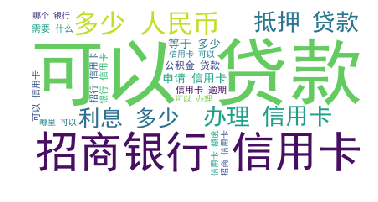

In [53]:
# color_mask = imread("img.png")
cloud = WordCloud(
    # 字体最好放在与脚本相同的目录下，而且必须设置
    font_path=r'c:\windows\Fonts\simhei.ttf',
    background_color='white',
    # mask=color_mask,
    max_words=20,
    max_font_size=5000
).generate(cut_text)
# cloud.to_file('new.jpg')
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [5]:
df = pd.read_csv(r'G:\BaiduNetdiskDownload/financezhidao_filter.csv').fillna('')

In [6]:
df.head()

,title,question,reply,is_best
0,壹方水榭可以用深*的公积金贷款吗，壹方水榭二套房,,由于各城市相关政策有所不同，具体您所在当地是否有开展公积金贷款业务，以及相关业务规定，您可以...,0
1,了多久能放款，为什么迟迟不放款,,我行贷款如您提交申请资料齐全审批大约15个工作日左右，因为中间涉及评估、办理抵押登记等环节，...,0
2,快速借款逾期有多严重,,若是我行贷款，如有消费，请您按时、足额在到期还款日之前还款。首先逾期会生成不良信用记录，影响...,0
3,转入多久到账，能查询进度吗,,若是招行转出，网上银行/手机银行转账汇款到账时间:同行转账:无论同城或异地，转入个人账户实时...,0
4,悦借钱骗人的,,涉及利益都不太好,0


In [8]:
df.shape

(768427, 4)

In [29]:
cluster = cluster_agt(df.title.sample(30000).tolist(), model, 50)

In [38]:
cluster = cluster_dbscan(df.title.sample(30000).tolist(), model, esp=1, min_samples=10)

In [33]:
cluster = cluster[['sentence', 'cluster_labels']]

In [39]:
cluster.cluster_labels.value_counts()

-1      21766
 1       2130
 9        592
 17       367
 12       285
 19       218
 20       194
 33       170
 34       133
 50       124
 11       117
 8        111
 60       108
 68       108
 32        87
 5         83
 111       82
 29        82
 13        73
 3         69
 135       64
 97        62
 4         62
 22        61
 38        54
 52        53
 43        49
 83        48
 113       48
 23        47
        ...  
 85        11
 110       11
 31        11
 109       11
 124       11
 161       11
 116       11
 100       11
 105       11
 163       11
 147       11
 39        11
 77        11
 67        11
 117       11
 155       10
 143       10
 153       10
 7         10
 151       10
 41        10
 15        10
 81        10
 78        10
 157       10
 136       10
 27        10
 131       10
 146       10
 107       10
Name: cluster_labels, Length: 165, dtype: int64